# Chapter4 案例练习——Python探索性分析

In [1]:
import pandas as pd # 数据表格工具
import numpy as np # 数值分析工具
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Step1：问题分析

|字段|中文|含义|
|:---|:---|:---|
|InvoiceNo|账单编号|为每笔订单唯一分配的6位整数|
|StockCode|产品代码|为每个产品唯一分配的编码|
|Description|产品描述|每笔订单中各产品分别的数量|
|Quantity|产品数量|每笔订单中各产品分别的数量|
|InvoiceDate|发票日期和时间|每笔订单发生的日期和时间|
|UnitPrice|单价|单位产品价格，单位为英镑|
|CustomerID|客户编号|为每个客户唯一分配的5位整数|
|Country|国家|客户所在国家/地区的名称|

## Step2：数据获取 

In [2]:
!pip install python-calamine

Defaulting to user installation because normal site-packages is not writeable


In [3]:
dtype = {
    "InvoiceNo": "string",
    "StockCode": "string",
    "Description": "string",
    "Quantity": "int32",
    "UnitPrice": "float32",
    "CustomerID": "string",
    "Country": "string"
}

filename = '../data/Online Retail Preprocessing.xlsx'
sales_success = pd.read_excel(filename, sheet_name='Online Retail Preprocessing', dtype=dtype, engine='calamine')

In [4]:
sales_success.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Month,Date,Dayofweek,Quarter,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,23.1030,138.6180,12,2010-12-01,2,4,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,24.9150,199.3200,12,2010-12-01,2,4,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8


In [5]:
# sales_success.InvoiceNo = sales_success.InvoiceNo.astype(string)
# sales_success.StockCode = sales_success.StockCode.astype(string)
# sales_success.Description = sales_success.Description.astype(string)
# sales_success.CustomerID = sales_success.CustomerID.astype(string)
# sales_success.Country = sales_success.Country.astype(string)

In [6]:
sales_success.dtypes

InvoiceNo        string[python]
StockCode        string[python]
Description      string[python]
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID       string[python]
Country          string[python]
UnitPrice_RMB           float64
SumPrice                float64
Month                     int64
Date             datetime64[ns]
Dayofweek                 int64
Quarter                   int64
Hour                      int64
dtype: object

## Step4：数据预处理

### 数据聚合

每笔订单的订单金额和订单内商品件数

In [7]:
invoice_grouped = sales_success.groupby('InvoiceNo')[['Quantity', 'SumPrice']].sum()
invoice_grouped

,Quantity,SumPrice
InvoiceNo,,
536365,40,1260.4272
536366,12,201.1320
536367,83,2525.2938
536368,15,634.6530
536369,3,161.7210
...,...,...
581584,120,1274.1984
581585,278,2981.1930
581586,66,3073.1520


每笔订单的订单金额和订单内商品件数（恢复行标签）

In [8]:
invoice_grouped = sales_success.groupby('InvoiceNo', as_index=False)[['Quantity', 'SumPrice']].sum()
invoice_grouped

,InvoiceNo,Quantity,SumPrice
0,536365,40,1260.4272
1,536366,12,201.1320
2,536367,83,2525.2938
3,536368,15,634.6530
4,536369,3,161.7210
...,...,...,...
19955,581584,120,1274.1984
19956,581585,278,2981.1930
19957,581586,66,3073.1520
19958,581587,105,2260.0170


每位客户的消费金额和客户消费件数

In [9]:
# 仅考虑客户ID不为0的
sales_customer = sales_success[sales_success.CustomerID != '0'].copy()
sales_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Month,Date,Dayofweek,Quarter,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,23.1030,138.6180,12,2010-12-01,2,4,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,24.9150,199.3200,12,2010-12-01,2,4,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,30.7134,184.2804,12,2010-12-01,2,4,8


In [10]:
sales_customer.groupby('CustomerID')[['SumPrice', 'Quantity']].sum()

,SumPrice,Quantity
CustomerID,,
12346,699283.4160,74215
12347,39048.6000,2458
12348,16282.9944,2341
12349,15923.4030,631
12350,3029.6640,197
...,...,...
18280,1636.2360,45
18281,732.2292,54
18282,1613.1330,103


每位客户的订单量、消费金额和客户消费件数

In [11]:
customer_grouped = sales_customer.groupby('CustomerID').agg({
    'InvoiceNo':'nunique',
    'SumPrice':'sum',
    'Quantity':'sum'
})
customer_grouped

,InvoiceNo,SumPrice,Quantity
CustomerID,,,
12346,1,699283.4160,74215
12347,7,39048.6000,2458
12348,4,16282.9944,2341
12349,1,15923.4030,631
12350,1,3029.6640,197
...,...,...,...
18280,1,1636.2360,45
18281,1,732.2292,54
18282,2,1613.1330,103


每个国家/地区的客户量、销售额和销售量

In [12]:
country_grouped = sales_customer.groupby('Country', as_index=False).agg({
    'CustomerID':'nunique',
    'SumPrice':'sum',
    'Quantity':'sum'
})
country_grouped

,Country,CustomerID,SumPrice,Quantity
0,Australia,9,1.254392e+06,83891
1,Austria,11,9.240004e+04,4881
2,Bahrain,2,4.968504e+03,260
3,Belgium,25,3.732388e+05,23237
4,Brazil,1,1.036102e+04,356
5,Canada,4,3.321740e+04,2763
6,Channel Islands,9,1.851913e+05,9485
7,Cyprus,8,1.223358e+05,6340
8,Czech Republic,1,7.490264e+03,671
9,Denmark,9,1.717354e+05,8235


### 数据透视表

#### 检查月份是否存在

In [13]:
sales_customer.dtypes

InvoiceNo        string[python]
StockCode        string[python]
Description      string[python]
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID       string[python]
Country          string[python]
UnitPrice_RMB           float64
SumPrice                float64
Month                     int64
Date             datetime64[ns]
Dayofweek                 int64
Quarter                   int64
Hour                      int64
dtype: object

#### 数据透视表

分析每位客户每月的销售量

In [14]:
sales_customer.pivot_table(index='CustomerID',
                           columns='Month',
                           values='Quantity',
                           aggfunc='sum',
                           fill_value=0)

Month,1,2,3,4,5,6,7,8,9,10,11,12
CustomerID,,,,,,,,,,,,
12346,74215,0,0,0,0,0,0,0,0,0,0,0
12347,315,0,0,483,0,196,0,277,0,676,0,511
12348,601,0,0,269,0,0,0,0,217,0,0,1254
12349,0,0,0,0,0,0,0,0,0,0,631,0
12350,0,197,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,45,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,54,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,75,0,0,0,28


按国家和月份统计总销售额的透视表

In [15]:
sales_success.pivot_table(index='Country',
                           columns='Month',
                           values='Quantity',
                           aggfunc='sum',
                           fill_value=0)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Australia,5644,8680,10439,225,8999,15981,5318,12570,4079,7401,4098,457
Austria,0,342,982,311,476,0,573,790,0,491,717,199
Bahrain,0,0,0,0,260,0,0,0,0,0,0,54
Belgium,792,1102,1783,1183,1829,2245,1679,2069,1969,3170,2560,2856
Brazil,0,0,0,356,0,0,0,0,0,0,0,0
Canada,0,0,88,0,504,1092,1027,52,0,0,0,0
Channel Islands,259,935,2104,97,224,836,0,2003,764,1407,716,140
Cyprus,144,2191,1005,0,0,356,0,0,33,1402,293,916
Czech Republic,0,346,0,0,0,0,0,0,0,325,0,0


不同商品在不同国家的总销售数量

In [16]:
sales_success.pivot_table(index=['StockCode', 'Description'],
                           columns='Country',
                           values='Quantity',
                           aggfunc='sum',
                           fill_value=0)

,Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
StockCode,Description,,,,,,,,,,,,,,,,,,,,,
10002,INFLATABLE POLITICAL GLOBE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,0,12,0,0,438,0
10080,GROOVY CACTUS INFLATABLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,303,0
10120,DOGGY RUBBER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,182,0
10123C,HEARTS WRAPPING TAPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
10124A,SPOTS ON RED BOOKCOVER TAPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


## Step5：描述性统计和可视化

### 分析1：订单维度

+ 笔单价和连带率是多少？
+ 订单金额与订单内商品件数的范围如何？
+ 订单金额与订单内商品件数什么关系？

#### 订单金额和订单内商品件数

+ 将sales_success按订单号的分组，对Quantity商品数量和SumPrice总价分组求和

In [17]:
invoice_grouped = sales_success.groupby('InvoiceNo')[['Quantity', 'SumPrice']].sum()
invoice_grouped

,Quantity,SumPrice
InvoiceNo,,
536365,40,1260.4272
536366,12,201.1320
536367,83,2525.2938
536368,15,634.6530
536369,3,161.7210
...,...,...
581584,120,1274.1984
581585,278,2981.1930
581586,66,3073.1520


#### 订单数、总销售额、笔单价 与 连带率（关键指标分析）

+ 笔单价（每笔订单的平均交易金额）
+ 连带率（每笔订单平均购买的产品件数）

+ 笔单价 = 商品销售总额 / 总成交笔数
+ 连带率 = 商品销售总量 / 总成交笔数

In [18]:
invoice_grouped.describe()

,Quantity,SumPrice
count,19960.000000,1.996000e+04
mean,279.179359,4.830537e+03
std,955.011810,1.613054e+04
min,1.000000,3.442800e+00
25%,69.000000,1.374357e+03
50%,150.000000,2.747898e+03
75%,296.000000,4.470770e+03
max,80995.000000,1.526335e+06


**讨论**
+ 笔单价为4681.25元(533.17英镑)，连带率约为279件，<font color='red'>说明以批发性质的订单为主</font>。
+ 订单交易金额和订单内商品件数，其均值都高于中位数；订单交易金额的均值甚至高于Q3分位数。说明订单总体差异大，存在部分购买力极强的客户。

#### 订单商品数量（分布分析）

Text(0.5, 0, 'Quantity')

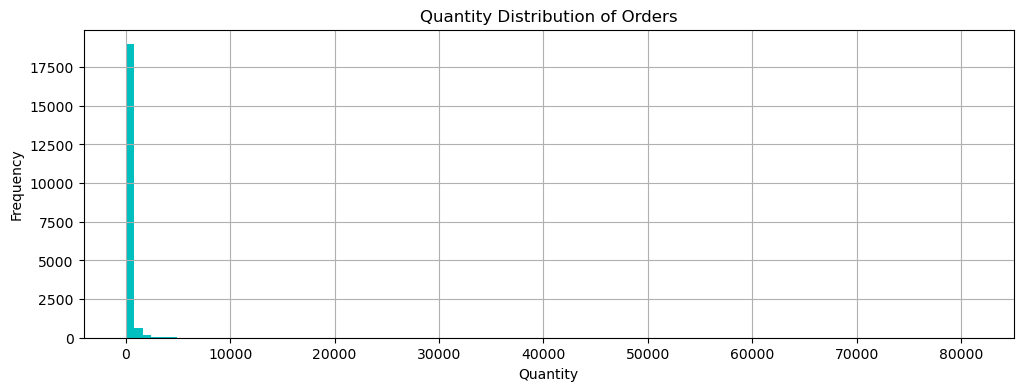

In [19]:
# 对订单内商品数量的分布同样绘制柱形图
invoice_grouped['Quantity'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

**讨论**
+ 同样由于小部分离群点使得横坐标的区间过大

Text(0.5, 0, 'Quantity')

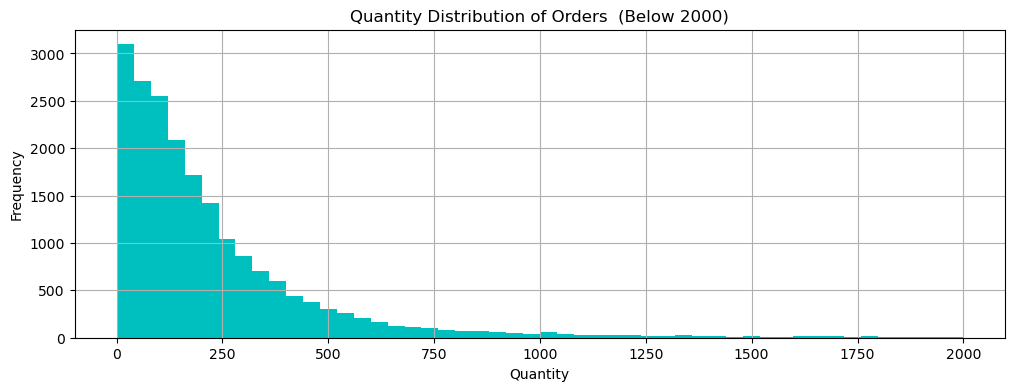

In [20]:
# 可视化，筛去2000件及商品以上的订单
invoice_grouped[invoice_grouped.Quantity < 2000]['Quantity'].hist(bins = 50, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders  (Below 2000)')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

**讨论**
+ 订单内的商品数量呈现出很典型的<font color='red'>长尾分布</font>，大部分订单的商品数量在250件内，商品数量越多，订单数相对越少，<font color='red'>从分布图看也有不少零售订单</font>。

#### 订单金额分布（分布分析）

+ 订单金额的分布图

Text(0.5, 0, 'SumPrice')

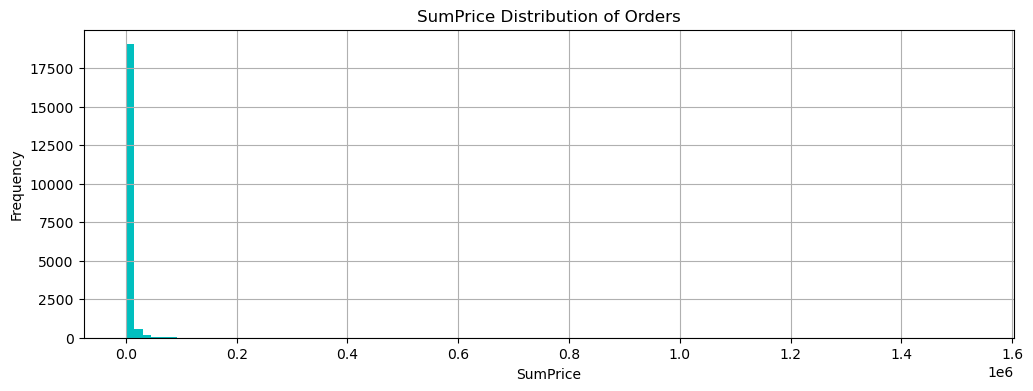

In [21]:
invoice_grouped['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

**讨论**
+ 部分订单交易金额过大，影响图表的可读性

Text(0.5, 0, 'SumPrice')

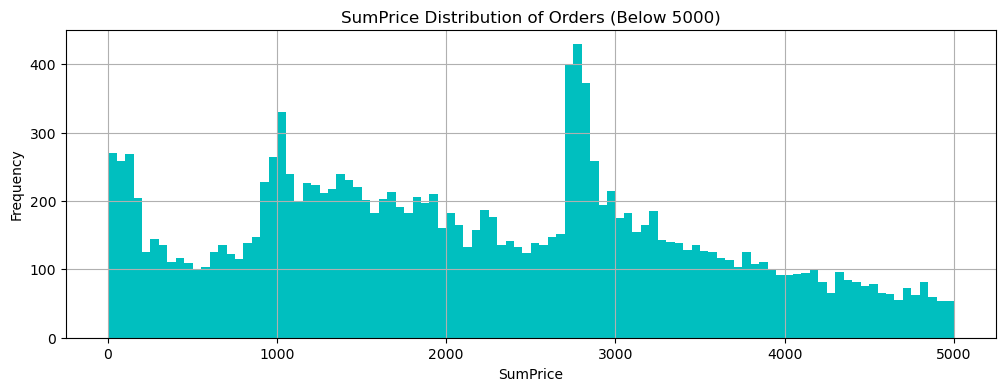

In [22]:
# 可视化，筛去5000人民币及以上的订单
invoice_grouped[invoice_grouped.SumPrice < 5000]['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders (Below 5000)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

**讨论**
+ 订单金额集中在3000元内，三个峰值分别为200元内、900-2000元、2400-3000元。
+ 其中2400-3000的订单数量特别多，<font color='red'>可能是否存在某种共性</font>，可以进行进一步探究。

#### 订单交易金额与订单内商品件数的关系（相关性分析）

In [23]:
# 相关系数，method：可选值为{‘pearson’,‘spearman’，‘kendall’}，默认为pearson
invoice_grouped.corr(method='pearson')

,Quantity,SumPrice
Quantity,1.000000,0.882687
SumPrice,0.882687,1.000000


**讨论**
+ 相关系数0.88, 表明订单金额和订单内商品数量强相关，即<font color='red'>订单中以产品单价较低的产品为主</font>

+ 可视化，探究订单交易金额与订单内商品件数的关系

Text(0.5, 0, 'Quantity')

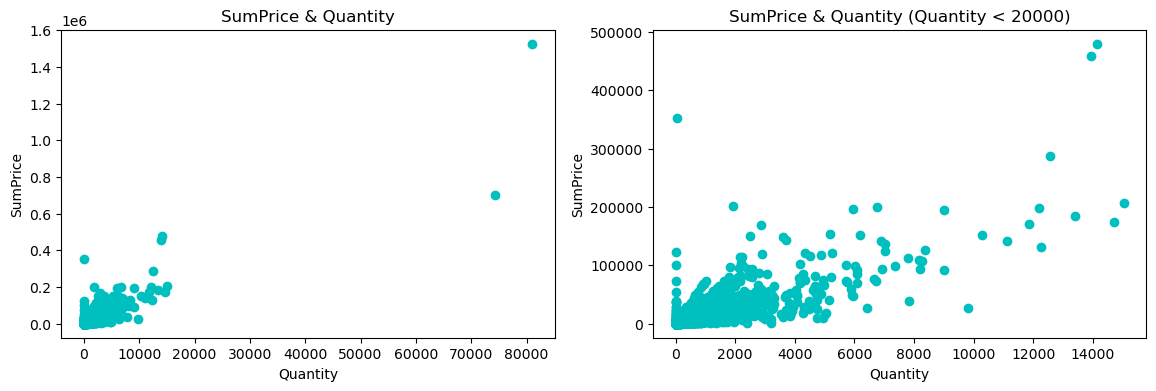

In [24]:
fig = plt.figure(figsize=(14,4))

# plt.subplot用于绘制子图，121表示分成1*2个图片区域，占用第一个。
plt.subplot(1, 2, 1)
plt.scatter(invoice_grouped['Quantity'], invoice_grouped['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

# 筛去商品件数在20000及以上的订单
plt.subplot(1, 2, 2)
plt.scatter(invoice_grouped[invoice_grouped.Quantity < 20000]['Quantity'], invoice_grouped[invoice_grouped.Quantity < 20000]['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity (Quantity < 20000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

**讨论**
+ 总体来说订单交易金额与订单内商品件数是正相关的，订单内的商品数越多，订单金额也相对越高。
+ 但在Quantity靠近0的位置也有若干量少高价的订单，后续可以试探究。

### 分析2：客户维度

+ 客单价、客单量、客单件多少？
+ 客户消费金额的范围
+ 高价值客户有哪些？

仅对含有CustomerID的客户进行分析

#### 客单价（ATV）、客单量和客单件（关键指标分析）

+ 统计各个客户的订单数量、消费金额和商品购买数

In [25]:
sales_customer = sales_success[sales_success['CustomerID'] != '0'].copy()

In [26]:
customer_grouped = sales_customer.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique', 
    'Quantity': 'sum', 
    'SumPrice': 'sum'
})
customer_grouped

,InvoiceNo,Quantity,SumPrice
CustomerID,,,
12346,1,74215,699283.4160
12347,7,2458,39048.6000
12348,4,2341,16282.9944
12349,1,631,15923.4030
12350,1,197,3029.6640
...,...,...,...
18280,1,45,1636.2360
18281,1,54,732.2292
18282,2,103,1613.1330


+ 计算客单价、客单量和客单件

In [27]:
customer_grouped.describe()

,InvoiceNo,Quantity,SumPrice
count,4338.000000,4338.000000,4.338000e+03
mean,4.272015,1187.644537,1.856111e+04
std,7.697998,5043.619654,8.140619e+04
min,1.000000,1.000000,3.397500e+01
25%,1.000000,159.000000,2.776731e+03
50%,2.000000,378.000000,6.057244e+03
75%,5.000000,989.750000,1.504501e+04
max,209.000000,196915.000000,2.538667e+06


**讨论**
+ 人均购买笔数为4笔，中位数为2笔，25%以上的客户仅下过一次单，并未留存；
+ 每位客户平均购买了1187件商品，甚至超过了Q3分位数，最多的客户购买了196915件,客单价为17987元（2049英镑），平均值同样超过了Q3分位数；
+ <font color='red'>说明客户的购买力较强，且存在较大差距，存在小部分的高消费用户拉高了人均数值</font>。

#### 客户消费件数（分布分析）

Text(0.5, 0, 'Quantity')

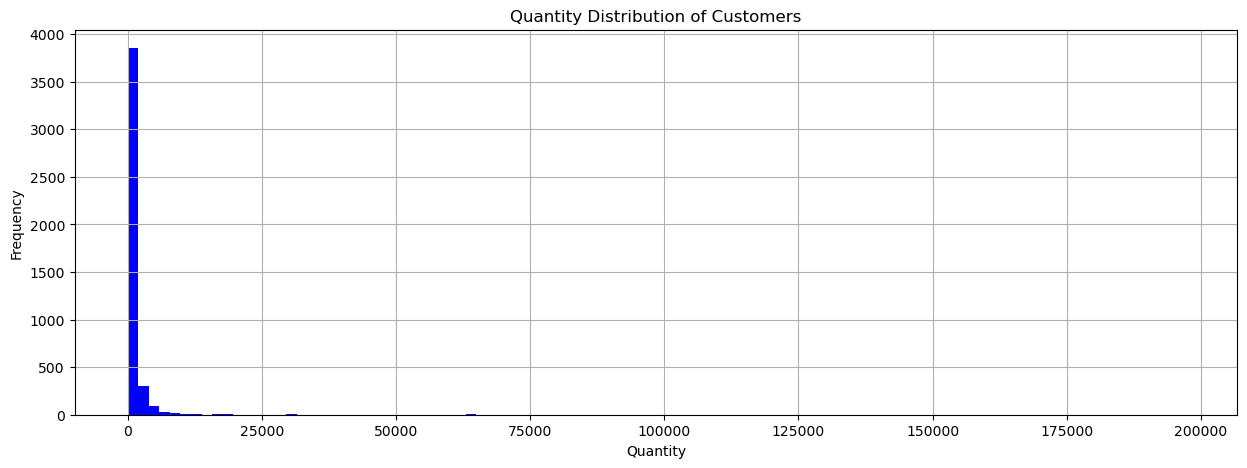

In [28]:
# 可视化，客户消费件数
customer_grouped.Quantity.hist(bins = 100, figsize = (15, 5), color = 'b')
plt.title('Quantity Distribution of Customers')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

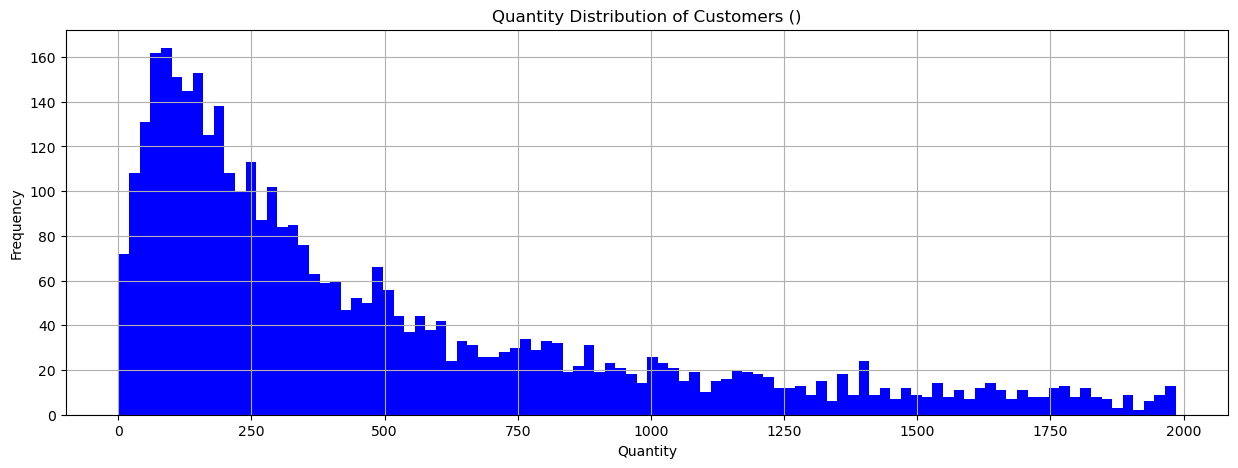

In [29]:
# 可视化，客户消费件数
customer_grouped[customer_grouped.Quantity <= 2000].Quantity.hist(bins = 100, figsize = (15, 5), color = 'b')
plt.title('Quantity Distribution of Customers ()')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

#### 客户消费金额（分布分析）

Text(0.5, 0, 'SumPrice')

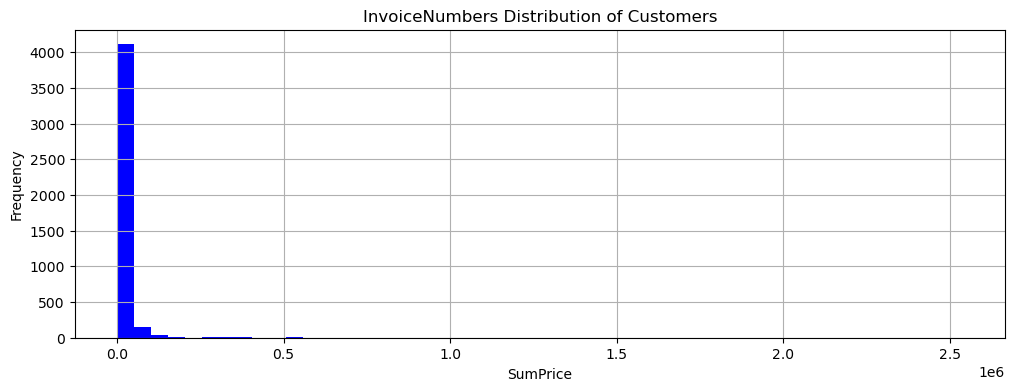

In [30]:
# 可视化，客户消费金额
customer_grouped.SumPrice.hist(bins = 50, figsize = (12, 4), color = 'b')
plt.title('InvoiceNumbers Distribution of Customers')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

**讨论**
+ 从直方图看，大部分用户的消费能力确实不高，高消费用户在图上几乎看不到。这也确实符合消费行为的行业规律。

Text(0.5, 0, 'SumPrice')

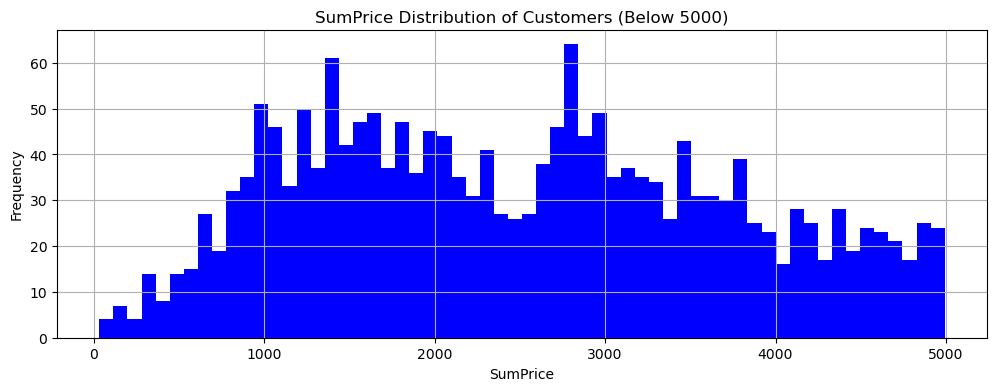

In [31]:
# 可视化，截取消费额5000人民币以内的客户
customer_grouped[customer_grouped.SumPrice < 5000].SumPrice.hist(bins = 60, figsize = (12, 4), color = 'b')
plt.title('SumPrice Distribution of Customers (Below 5000)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

**讨论**
+ 与前面订单金额的多峰分布相似，<font color='red'>客户消费金额的分布呈现双峰长尾形态，峰值分别在83-333英镑间</font>。

#### 客户消费订单次数（分布分析）

Text(0.5, 0, 'InvoiceNumbers')

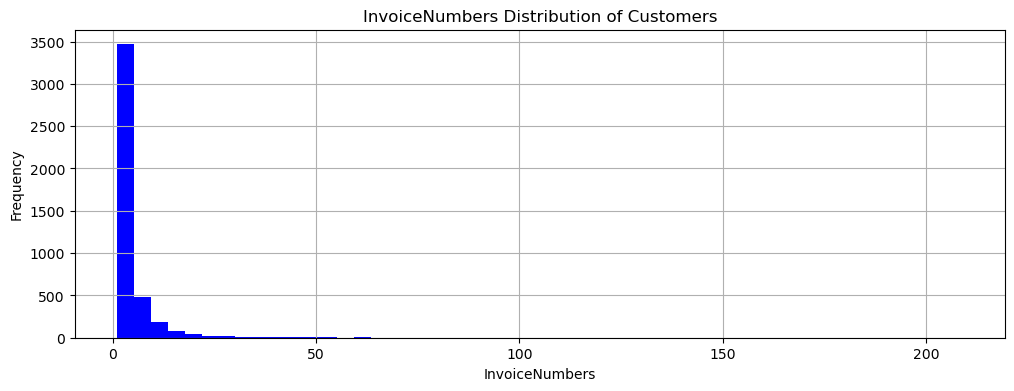

In [32]:
# 可视化，客户消费件数
customer_grouped.InvoiceNo.hist(bins = 50, figsize = (12, 4), color = 'b')
plt.title('InvoiceNumbers Distribution of Customers')
plt.ylabel('Frequency')
plt.xlabel('InvoiceNumbers')

**讨论**
+ 从直方图看，大部分用户的消费次数不高。

Text(0.5, 0, 'InvoiceNumbers')

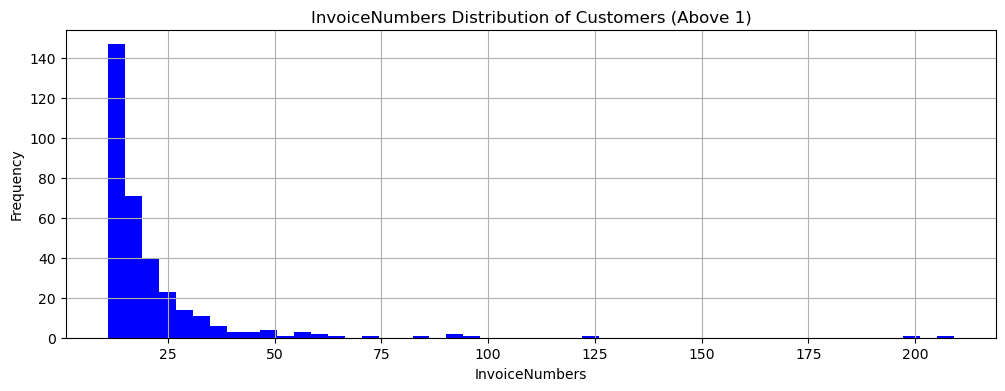

In [33]:
# 可视化，客户消费次数大于10
customer_grouped[customer_grouped.InvoiceNo > 10].InvoiceNo.hist(bins = 50, figsize = (12, 4), color = 'b')
plt.title('InvoiceNumbers Distribution of Customers (Above 1)')
plt.ylabel('Frequency')
plt.xlabel('InvoiceNumbers')

**讨论**
+ 从直方图看，大部分用户的消费次数不高。

#### 客户消费金额与消费件数（相关性分析）

In [34]:
# 相关系数
customer_grouped.corr()

,InvoiceNo,Quantity,SumPrice
InvoiceNo,1.000000,0.557216,0.552780
Quantity,0.557216,1.000000,0.922942
SumPrice,0.552780,0.922942,1.000000


**讨论**
+ 客户消费金额和客户消费件数的相关系数为0.922942，<font color='red'>表明平台上的客户主要购买小额产品为主</font>

Text(0.5, 0, 'Quantity')

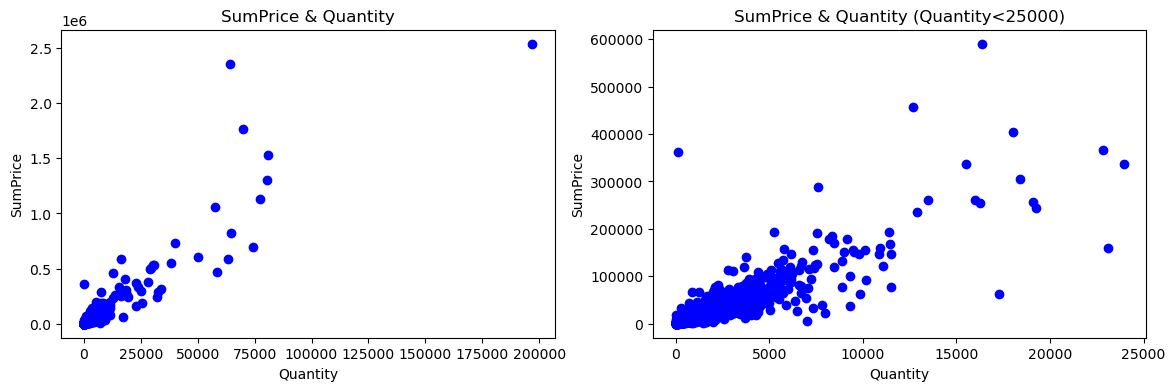

In [35]:
# 客户消费金额与消费件数的散点图
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(customer_grouped['Quantity'], customer_grouped['SumPrice'], color = 'b')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(customer_grouped[customer_grouped.Quantity < 25000]['Quantity'], customer_grouped[customer_grouped.Quantity < 25000]['SumPrice'], color = 'b')
plt.title('SumPrice & Quantity (Quantity<25000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

**讨论**
+ 客户群体比较健康，而且规律性比订单更强，<font color='red'>同时拥有一定数量消费能力强的用户</font>。
+ 总体来说，客户的消费金额与购买的商品数量是正相关的，<font color='red'>客户购买的东西越多，消费金额相对就越高</font>。

### 客户的RFM值

分组聚合来分别计算RFM

In [36]:
rfm = sales_customer.groupby('CustomerID').agg({
    'SumPrice':'sum',
    'Date':'max',
    'InvoiceNo':'nunique'
})
customer_grouped.head()

,InvoiceNo,Quantity,SumPrice
CustomerID,,,
12346,1,74215,699283.4160
12347,7,2458,39048.6000
12348,4,2341,16282.9944
12349,1,631,15923.4030
12350,1,197,3029.6640


日期最晚一天的第二天作为今天

In [37]:
now = sales_customer.InvoiceDate.max() + pd.Timedelta(days=1)
now

Timestamp('2011-12-10 12:50:00')

今天减去日期最近的那天，就是R

In [38]:
rfm.Date = (now - rfm.Date).dt.days
rfm

,SumPrice,Date,InvoiceNo
CustomerID,,,
12346,699283.4160,326,1
12347,39048.6000,3,7
12348,16282.9944,76,4
12349,15923.4030,19,1
12350,3029.6640,311,1
...,...,...,...
18280,1636.2360,278,1
18281,732.2292,181,1
18282,1613.1330,8,2


重新命名列

In [39]:
rfm.rename(columns={
    'Date':'R',
    'InvoiceNo':'F',
    'SumPrice':'M'
}, inplace=True)
rfm

,M,R,F
CustomerID,,,
12346,699283.4160,326,1
12347,39048.6000,3,7
12348,16282.9944,76,4
12349,15923.4030,19,1
12350,3029.6640,311,1
...,...,...,...
18280,1636.2360,278,1
18281,732.2292,181,1
18282,1613.1330,8,2


可以一次性算出来

In [40]:
now = sales_customer.InvoiceDate.max() + pd.Timedelta(days=1)
rfm = sales_customer.groupby('CustomerID').agg(
    R=('InvoiceDate', lambda x: (now - x.max()).days),
    F=('InvoiceNo','nunique'),    
    M=('SumPrice', 'sum')
)
rfm

,R,F,M
CustomerID,,,
12346,326,1,699283.4160
12347,2,7,39048.6000
12348,75,4,16282.9944
12349,19,1,15923.4030
12350,310,1,3029.6640
...,...,...,...
18280,278,1,1636.2360
18281,181,1,732.2292
18282,8,2,1613.1330


### 分析3：商品维度

问题：哪种商品卖得好？
+ 哪些商品卖得好？
+ 商品处于哪个价格范围？
+ 哪种价位的商品卖得好？
+ 哪种价位的商品带来了实际上最多的销售额？

#### 分组聚合

In [41]:
goods_grouped = sales_success.groupby(['StockCode', 'Description']).agg({
    'InvoiceNo': 'nunique',
    'SumPrice': 'sum',
    'Quantity': 'sum'
})
goods_grouped.head()

,,InvoiceNo,SumPrice,Quantity
StockCode,Description,,,
10002,INFLATABLE POLITICAL GLOBE,71,6884.6034,860
10080,GROOVY CACTUS INFLATABLE,22,1078.9554,303
10120,DOGGY RUBBER,29,365.2992,192
10123C,HEARTS WRAPPING TAPE,3,29.4450,5
10124A,SPOTS ON RED BOOKCOVER TAPE,5,60.8832,16


#### 商品销售量（对比分析）

In [42]:
# 销售量降序排序
goods_grouped.sort_values('Quantity', ascending=False).head(10)

,,InvoiceNo,SumPrice,Quantity
StockCode,Description,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",1,1.526335e+06,80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,247,7.402103e+05,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,535,1.251549e+05,54951
85099B,JUMBO BAG RED RETROSPOT,2089,8.530879e+05,48371
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2189,9.448152e+05,37580
22197,POPCORN HOLDER,803,3.106554e+05,36749
21212,PACK OF 72 RETROSPOT CAKE CASES,1320,1.924928e+05,36396
84879,ASSORTED COLOUR BIRD ORNAMENT,1455,5.338842e+05,36362
23084,RABBIT NIGHT LIGHT,994,6.058425e+05,30739


**讨论**
+ 按照销售量看，前三位是：
 + 1、paper craft , little birdie（纸工艺，小鸟）
 + 2、medium ceramic top storage jar（中型陶瓷储罐）
 + 3、world war 2 gliders asstd designs（二次世界大战滑翔机）

#### 商品销售额（对比分析）

In [43]:
# 销售金额降序排序
goods_grouped.sort_values('SumPrice', ascending=False).head(10)

,,InvoiceNo,SumPrice,Quantity
StockCode,Description,,,
DOT,DOTCOM POSTAGE,706,1.868614e+06,706
22423,REGENCY CAKESTAND 3 TIER,1988,1.577858e+06,13851
23843,"PAPER CRAFT , LITTLE BIRDIE",1,1.526335e+06,80995
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2189,9.448152e+05,37580
47566,PARTY BUNTING,1685,9.009738e+05,18283
85099B,JUMBO BAG RED RETROSPOT,2089,8.530879e+05,48371
23166,MEDIUM CERAMIC TOP STORAGE JAR,247,7.402103e+05,78033
POST,POSTAGE,1126,7.076030e+05,3150
M,Manual,289,7.044174e+05,6984


**讨论**
+ 按照销售额看，前三位是：
 + 1、regency cakestand 3 tier（可再生三层蛋糕架）
 + 2、paper craft , little birdie（纸工艺，小鸟）
 + 3、paper craft , little birdie（白吊心T灯架）

#### 商品订单量（对比分析）

In [44]:
# 订单量降序排序
goods_grouped.sort_values('InvoiceNo', ascending=False).head()

,,InvoiceNo,SumPrice,Quantity
StockCode,Description,,,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2189,9.448152e+05,37580
85099B,JUMBO BAG RED RETROSPOT,2089,8.530879e+05,48371
22423,REGENCY CAKESTAND 3 TIER,1988,1.577858e+06,13851
47566,PARTY BUNTING,1685,9.009738e+05,18283
20725,LUNCH BAG RED RETROSPOT,1564,3.222856e+05,19232


**讨论**
+ 按照订单量看，前三位是：
 + 1、white hanging heart t-light holder（白吊心T灯架）
 + 2、jumbo bag red retrospot	（红色巨型复古手提包）
 + 3、regency cakestand 3 tier	（可再生三层蛋糕架）

#### 商品处于哪个价格范围？

In [45]:
sales_success.loc[sales_success.StockCode == '10002'].UnitPrice_RMB.value_counts()

UnitPrice_RMB
7.7010     50
15.0396    14
14.7678     7
Name: count, dtype: int64

讨论：
+ 相同的商品在不同的订单中单价不同，可知商品的单价会发生波动，以商品10002为例

求每件商品的平均价格，平均价格=该商品的总销售额 / 该商品的销售数量

In [46]:
goods_grouped['AvgPrice'] = goods_grouped.SumPrice / goods_grouped.Quantity
goods_grouped.head()

,,InvoiceNo,SumPrice,Quantity,AvgPrice
StockCode,Description,,,,
10002,INFLATABLE POLITICAL GLOBE,71,6884.6034,860,8.005353
10080,GROOVY CACTUS INFLATABLE,22,1078.9554,303,3.560909
10120,DOGGY RUBBER,29,365.2992,192,1.902600
10123C,HEARTS WRAPPING TAPE,3,29.4450,5,5.889000
10124A,SPOTS ON RED BOOKCOVER TAPE,5,60.8832,16,3.805200


Text(0.5, 0, 'AvgPrice')

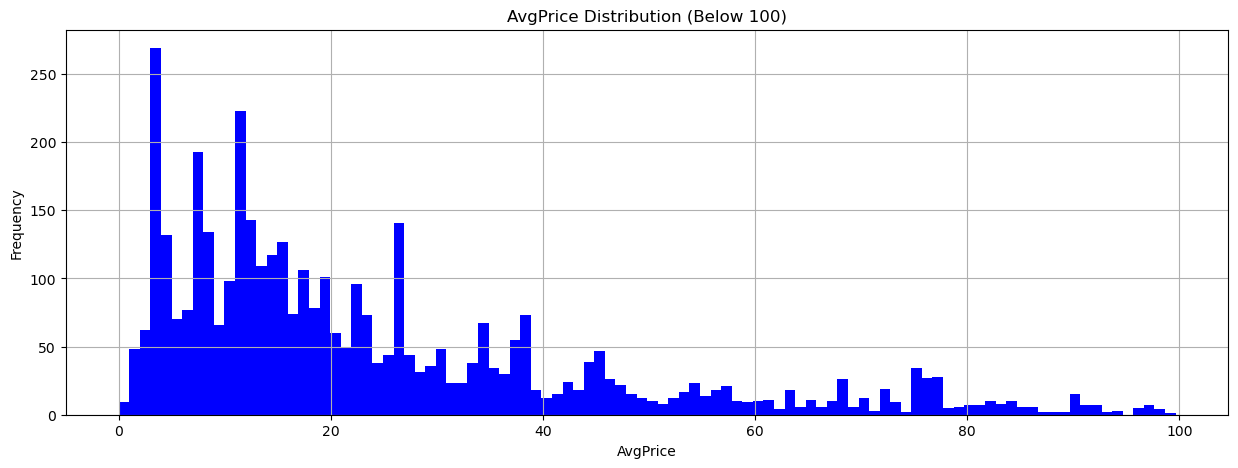

In [47]:
goods_grouped[goods_grouped.AvgPrice < 100].AvgPrice.hist(bins=100, figsize=(15, 5), color='b')
plt.title('AvgPrice Distribution (Below 100)')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')

讨论
+ 峰值是1-2元，单价20元以上的商品已经很少见。
+ 看来该电商的定位主要是价格低的小商品市场。

### 分析4：时间维度

#### 时间特征确定

In [48]:
sales_success.dtypes

InvoiceNo        string[python]
StockCode        string[python]
Description      string[python]
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID       string[python]
Country          string[python]
UnitPrice_RMB           float64
SumPrice                float64
Month                     int64
Date             datetime64[ns]
Dayofweek                 int64
Quarter                   int64
Hour                      int64
dtype: object

In [49]:
# 月份
sales_success['Month'] = sales_success['InvoiceDate'].dt.month
# 日期
sales_success['Date'] = pd.to_datetime(sales_success['InvoiceDate'].dt.date)
# 星期几
sales_success['Dayofweek'] = sales_success['InvoiceDate'].dt.dayofweek
# 季度
sales_success['Quarter'] = sales_success['InvoiceDate'].dt.quarter
# 小时
sales_success['Hour'] = sales_success['InvoiceDate'].dt.hour

In [50]:
sales_success.dtypes

InvoiceNo        string[python]
StockCode        string[python]
Description      string[python]
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID       string[python]
Country          string[python]
UnitPrice_RMB           float64
SumPrice                float64
Month                     int32
Date             datetime64[ns]
Dayofweek                 int32
Quarter                   int32
Hour                      int32
dtype: object

In [51]:
# 对时间相关字段的操作有可能产生缺失值，再次查看缺失值情况
sales_success.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
UnitPrice_RMB    0
SumPrice         0
Month            0
Date             0
Dayofweek        0
Quarter          0
Hour             0
dtype: int64

**讨论**
+ 并未新增缺失值

#### 月份（趋势分析）

问题：各月的销售情况是什么走势？

+ 销售量
+ 销售额
+ 订单量

In [52]:
# 以月份为单位进行折线图绘制，这里对Quantity和SumPrice分组求和，代表每月的销量和销售额，对InvoiceNo计数，代表每月的订单数。
month_grouped = sales_success.groupby('Month').agg({
    'Quantity': 'sum', 
    'SumPrice': 'sum', 
    'InvoiceNo': 'nunique'
})
month_grouped

,Quantity,SumPrice,InvoiceNo
Month,,,
1,387099,6.249693e+06,1086
2,282934,4.734263e+06,1100
3,376599,6.488910e+06,1454
4,307953,4.864935e+06,1246
5,395001,6.969827e+06,1681
6,388511,6.890556e+06,1533
7,399693,6.505770e+06,1475
8,421020,6.866043e+06,1361
9,569573,9.571303e+06,1837


Text(0, 0.5, 'Order quantities')

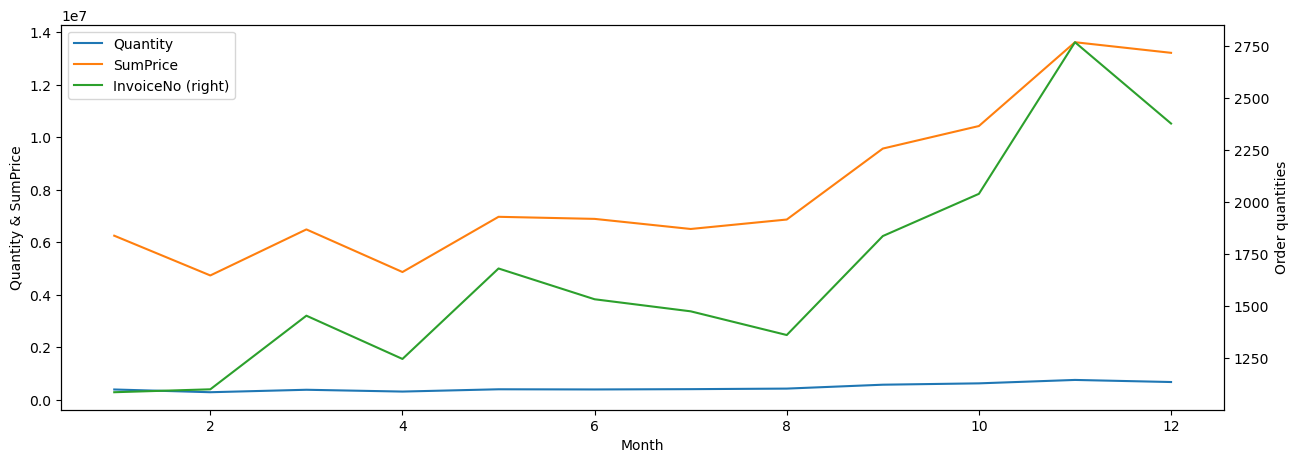

In [53]:
# 此处采用双坐标图，销量和销售额为左轴，参数secondary_y = 'InvoiceNo'表示订单数为右轴：
month = month_grouped.plot.line(secondary_y = 'InvoiceNo', figsize = (15, 5))
month.set_ylabel('Quantity & SumPrice')
month.right_ax.set_ylabel('Order quantities')

**讨论**
+ 需要注意此处2011年12月仅统计了前9天，如果全月能基本保持前9天的销售情况，销售额会远超2010年同期。
+ 观察到三条折线总体上呈现相近的趋势，除了2011年2月和4月略低外，2010年12月至2011年8月基本维持相近的销售情况；
+ 随后在9月-11月连续增长，达到高峰。考虑该电商平台主营礼品，受节日影响可能较大。
+ 欧洲重视的万圣节（11月1日）和圣诞节（12月25日）都在年末，与图中的趋势能够相呼应；
+ 同时虽然感恩节（11月第4个周四）是美国节日，但“黑五”的营销方式对全球都产生了一定影响。

#### 日期（趋势分析）

In [54]:
# 这里对Quantity和SumPrice分组求和，代表每日的销量和销售额，对InvoiceNo唯一计数，代表每日的订单数。
day_grouped = sales_success.groupby('Date').agg({
    'Quantity': 'sum', 
    'SumPrice': 'sum', 
    'InvoiceNo': 'nunique'
})
day_grouped

,Quantity,SumPrice,InvoiceNo
Date,,,
2010-12-01,26818,5.325177e+05,127
2010-12-02,31264,4.315225e+05,142
2010-12-03,16158,4.249016e+05,68
2010-12-05,16242,2.841635e+05,88
2010-12-06,21619,4.948948e+05,102
...,...,...,...
2011-12-05,44497,8.029048e+05,127
2011-12-06,30377,5.124230e+05,115
2011-12-07,41789,6.823589e+05,106


Text(0, 0.5, 'Order quantities')

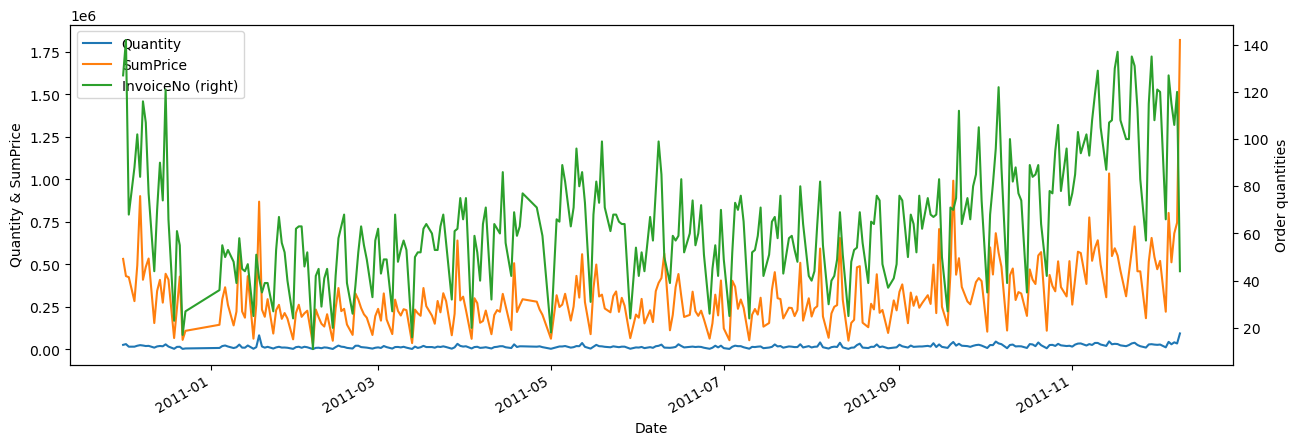

In [55]:
# 按日绘制折线图
day = day_grouped.plot(secondary_y = 'InvoiceNo', figsize = (15, 5))
day.set_ylabel('Quantity & SumPrice')
day.right_ax.set_ylabel('Order quantities')

**讨论**
+ 销量Quantity、销售额SumPrice、订单量InvoiceNo的趋势是极趋同的，这也和前一节中分析出<font color='red'>该电商以低价商品为主相吻合，商品单价低且价位集中，则销售额主要随销量变化而涨跌</font>。
+ 周期波动，可能是受星期的影响
+ 注意到在最后一天（即2011年12月9日），销量、销售额显著激增，我们放大看看

Text(0, 0.5, 'Order quantities')

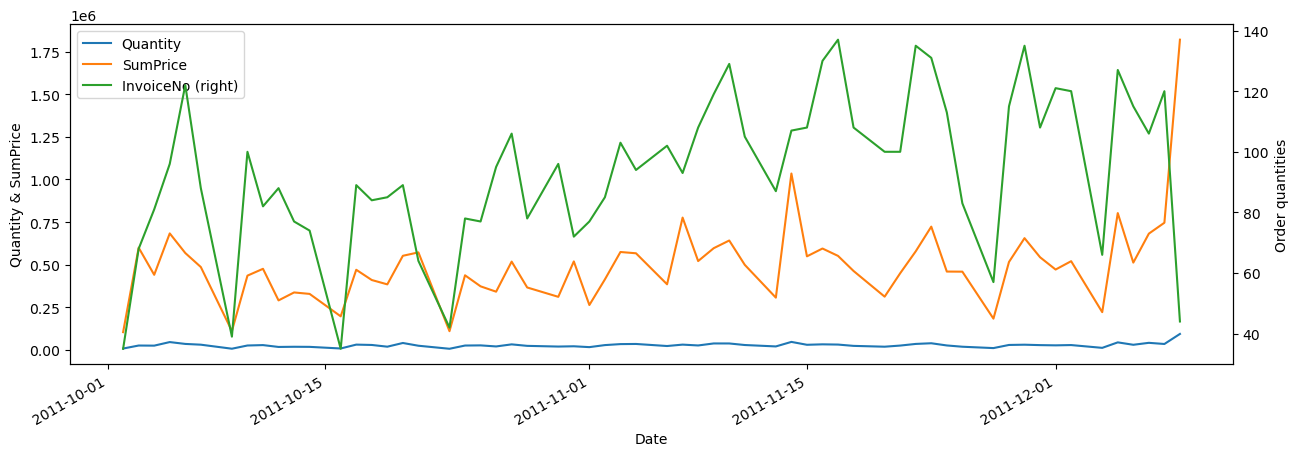

In [56]:
# 节取2011年10月1日至2011年12月9日
day_part = day_grouped.loc['2011-10-01':'2011-12-09'].plot(secondary_y = 'InvoiceNo', figsize = (15, 5))
day_part.set_ylabel('Quantity & SumPrice')
day_part.right_ax.set_ylabel('Order quantities')

**讨论**
+ 2011年12月的前8天基本延续了11月下旬的销售趋势，但在12月9日订单量大幅下降时，却创造了样本区间内销量和销售额的历史新高。说明存在某笔或某几笔购买量极大的订单，从而使得销售额大幅上升。
+ 周期震荡现象更加明显

In [57]:
# 将当日的销售详单拉取出来
sales_success[sales_success.Date == '2011-12-09'].sort_values(by = 'SumPrice', ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Month,Date,Dayofweek,Quarter,Hour
523404,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080000,16446,United Kingdom,18.8448,1.526335e+06,12,2011-12-09,4,4,9
524520,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.170044,0,United Kingdom,15530.3802,1.553038e+04,12,2011-12-09,4,4,10
523888,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.169983,0,United Kingdom,8454.5202,8.454520e+03,12,2011-12-09,4,4,10
523407,581485,20749,ASSORTED COLOUR MINI CASES,84,2011-12-09 09:38:00,6.350000,17389,United Kingdom,57.5310,4.832604e+03,12,2011-12-09,4,4,9
524674,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.260000,18102,United Kingdom,29.5356,4.253126e+03,12,2011-12-09,4,4,11


**讨论**
+ 破案了，有一个英国的客户，一口气购买了8万余件的纸工艺品，贡献了1479163元（168469.60英镑）的销售额。
+ 建议对大客户配备固定客服，好及时获知对方的需求与意见，并增加客户的认同感。
+ 不过反过来说，12月之后的20余天应该是无法保持这么迅猛的销售势头了。

In [58]:
# 看下这个客户的历史订单
sales_success[sales_success.CustomerID == 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Month,Date,Dayofweek,Quarter,Hour


**讨论**
+ 这位客户只在平台上购买了2笔，前一笔买了餐具刷、餐具糕点刷
+ 建议对大客户配备固定客服，好及时获知对方的需求与意见，并增加客户的认同感。

#### 星期（趋势分析）

Text(0, 0.5, 'Order quantities')

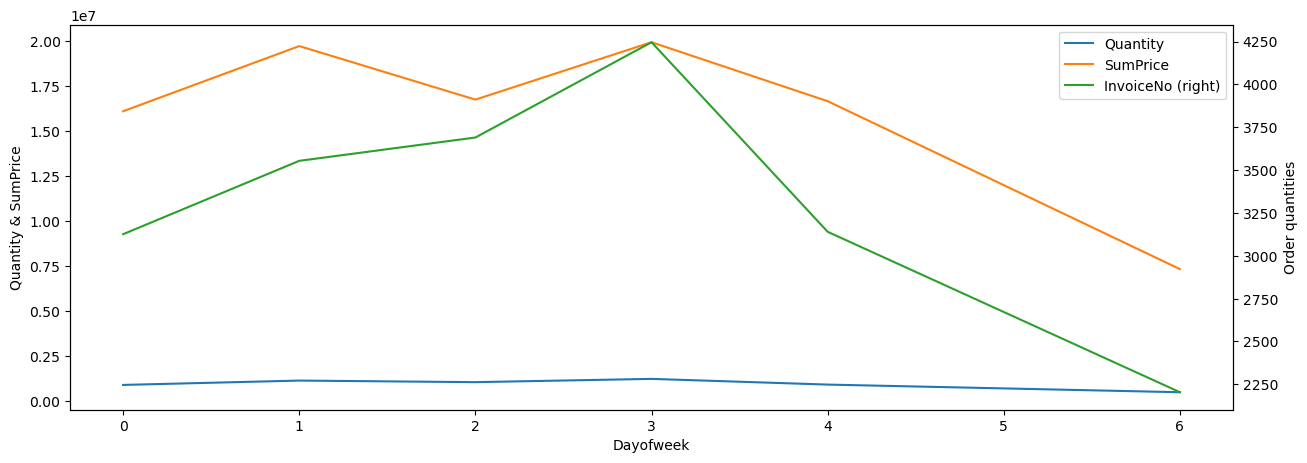

In [59]:
# 以星期为单位，统计
week_grouped = sales_success.groupby('Dayofweek').agg({
    'Quantity':'sum', 
    'SumPrice':'sum', 
    'InvoiceNo': 'nunique'
})

week = week_grouped.plot(secondary_y = 'InvoiceNo', figsize = (15, 5))
week.set_ylabel('Quantity & SumPrice')
week.right_ax.set_ylabel('Order quantities')

**讨论**
+ Quantity、SumPrice和InvoiceNo的趋势基本相同，工作日多，周末少，因为是批发订单，周末放假
+ 周四的订单数量最高，说明一周里面周四的效率最高
+ 周六订单比较数据中没有显示，需要进一步确认

In [60]:
sales_success[sales_success.Dayofweek == 5].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_RMB,SumPrice,Month,Date,Dayofweek,Quarter,Hour


**讨论**
+ 周六确实没有订单，原因？

Text(0, 0.5, 'Order quantities')

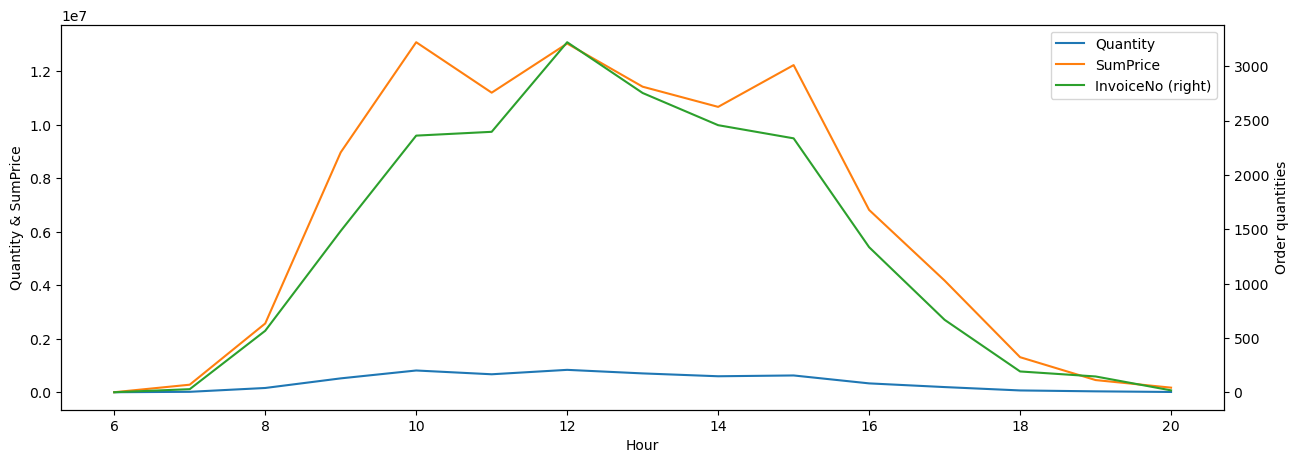

In [61]:
# 以小时为单位，统计
hour_grouped = sales_success.groupby('Hour').agg({
    'Quantity':'sum', 
    'SumPrice':'sum', 
    'InvoiceNo': 'nunique'
})

hour = hour_grouped.plot(secondary_y = 'InvoiceNo', figsize = (15, 5))
hour.set_ylabel('Quantity & SumPrice')
hour.right_ax.set_ylabel('Order quantities')

**讨论**
+ 主要下单时间在上午10点-下午4点，而晚上基本上没有订单
+ 该平台上的下单说明是工作性质的下单

### 分析5：区位维度

**问题**
+ 客户主要来自哪几个国家？
+ 哪个国家是境外主要市场？
+ 哪个国家的客户平均消费能力最强？

#### 客户主要来自哪几个国家？（对比分析）

仅对含有CustomerID的客户进行分析

In [62]:
sales_customer = sales_success[sales_success['CustomerID'] != '0'].copy()

In [63]:
# 按国家再次分组，计算出各国客户的消费总额和客户总数
country_grouped = sales_success.groupby('Country').agg({
    'SumPrice': 'sum', 
    'Quantity': 'sum',
    'CustomerID': 'nunique'
})
country_grouped.sort_values('CustomerID', ascending=False).head()

,SumPrice,Quantity,CustomerID
Country,,,
United Kingdom,8.155580e+07,4646906,3921
Germany,2.071826e+06,119154,94
France,1.899206e+06,112060,88
Spain,5.577206e+05,27933,30
Belgium,3.732388e+05,23237,25


绘制条形图

In [64]:
fig_bar = px.bar(country_grouped.sort_values('SumPrice', ascending=False).reset_index(), # Sort for clarity
                 x="Country",
                 y="CustomerID",
                 title="Total Sales (SumPrice) by Country",
                 labels={'SumPrice':'Total Sales (SumPrice)'}, # Nicer axis label
                 height=400) # Adjust height if needed

fig_bar.update_layout(
    xaxis_title="Country",
    yaxis_title="Total Sales"
)

#### 哪个国家是境外主要市场？（贡献分析）

In [65]:
# 计算贡献比
sumprice = country_grouped['SumPrice'].sum()
country_grouped['SalesRate'] = country_grouped['SumPrice'] / sumprice
country_grouped.sort_values(by = 'SalesRate',ascending = False).head(10)

,SumPrice,Quantity,CustomerID,SalesRate
Country,,,,
United Kingdom,8.155580e+07,4646906,3921,0.845861
Netherlands,2.586144e+06,200361,9,0.026822
EIRE,2.565253e+06,147007,4,0.026606
Germany,2.071826e+06,119154,94,0.021488
France,1.899206e+06,112060,88,0.019698
Australia,1.254392e+06,83891,9,0.013010
Spain,5.577206e+05,27933,30,0.005784
Switzerland,5.170325e+05,30617,22,0.005362
Belgium,3.732388e+05,23237,25,0.003871


<Axes: ylabel='SalesRate'>

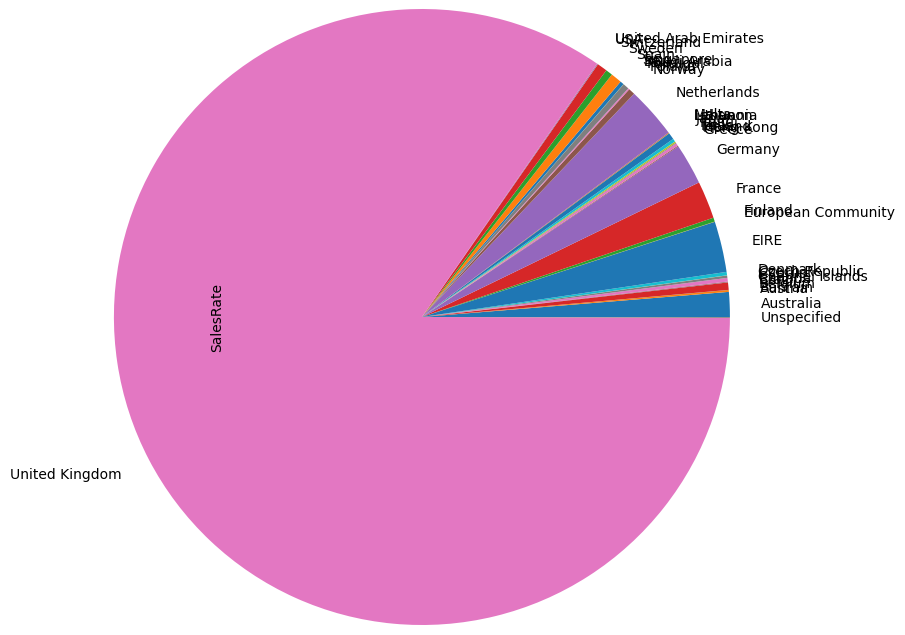

In [66]:
# 可视化，销售额贡献比
country_grouped.SalesRate.plot.pie(figsize = (5, 5), radius=2)

In [67]:
fig_map = px.choropleth(country_grouped.reset_index(),
                            locations="Country",         # Column with country names/codes
                            locationmode='country names', # Specify we are using names
                            color="SalesRate",            # Column to determine color intensity
                            hover_name="Country",        # What to show on hover over country
                            hover_data={"Country":':,.2f', "Country":False}, # Format hover sum, hide default country
                            color_continuous_scale=px.colors.sequential.Mint, # Green-Blue scale, similar to target
                            # Alternatives: 'Mint', 'Teal', 'Blues', 'Greens' - Experiment!
                            # template='plotly_white', # Use a clean background template
                            title="Total Sales (Country) by Country")

fig_map.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0}, # Adjust margins for better fit
        geo=dict(showframe=False, showcoastlines=False) # Cleaner map appearance
    )

**讨论**
+ 可知绝大部分客户仍来自英国本土，主要境外收入来源也多为英国周边国家，基本上符合以英国为圆心向外辐射的情况。
+ 这种现象可能和运输成本及语言等有关，也可能是影响力随距离而衰减，可以尝试增加境外的宣传投放，提高知名度；
+ 同时建议网站做好多国语言的适配，也可以在网站上对于境外物流费用计算及手续办理等事项给出更易懂的说明。

#### 哪个国家的客户平均消费能力最强？（对比分析）

In [68]:
# 新增AvgAmount字段，用于存放该国家客户的人均消费金额
country_grouped['AvgAmount'] = country_grouped['SumPrice'] / country_grouped['CustomerID']

In [69]:
# 对人均消费总额降序排列
country_grouped.sort_values(by = 'AvgAmount',ascending = False).head(10)

,SumPrice,Quantity,CustomerID,SalesRate,AvgAmount
Country,,,,,
EIRE,2.565253e+06,147007,4,0.026606,641313.277800
Netherlands,2.586144e+06,200361,9,0.026822,287349.315600
Singapore,1.927904e+05,5241,1,0.002000,192790.367400
Hong Kong,1.402760e+05,4713,1,0.001455,140275.980000
Australia,1.254392e+06,83891,9,0.013010,139376.835400
Sweden,3.476125e+05,36078,8,0.003605,43451.567475
Japan,3.389923e+05,26016,8,0.003516,42374.039025
Iceland,3.904860e+04,2458,1,0.000405,39048.600000
Norway,3.276589e+05,19336,10,0.003398,32765.888640


In [70]:
fig_bar = px.bar(country_grouped.sort_values('AvgAmount', ascending=False).reset_index(), # Sort for clarity
                 x="Country",
                 y="AvgAmount",
                 title="Total Sales (AvgAmount) by Country",
                 labels={'AvgAmount':'Total Sales (AvgAmount)'}, # Nicer axis label
                 height=400) # Adjust height if needed

fig_bar.update_layout(
    xaxis_title="Country",
    yaxis_title="Average Amount"
)

# 课堂练习